## DBSCAN + K-Means

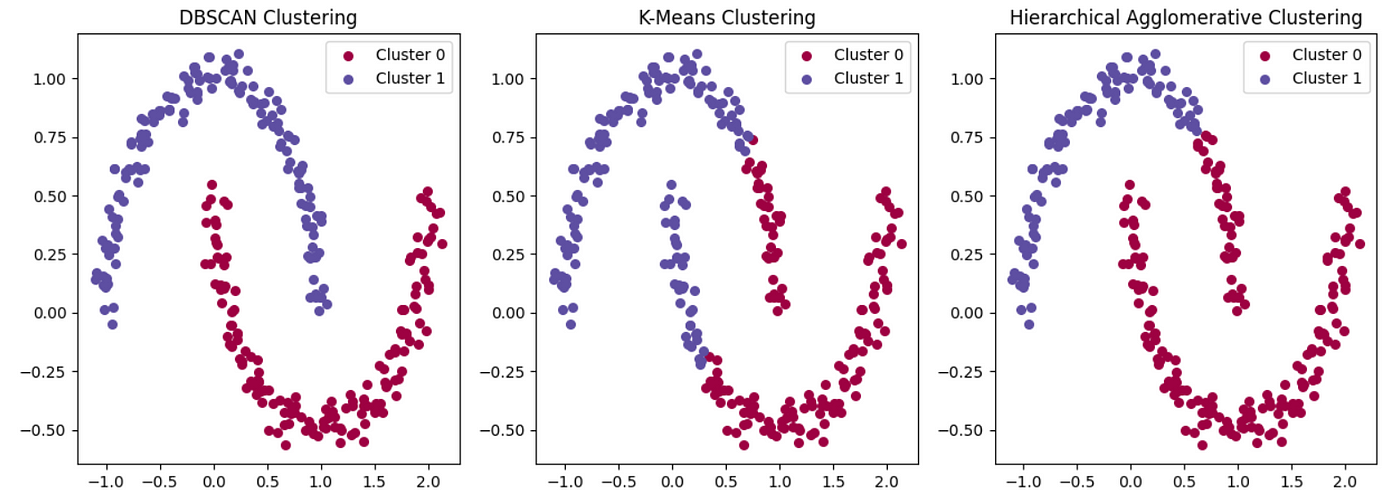


DBScan and K-Means are popular clustering algorithms. 

What is a clustering algorithm?

As the name implies, it is an algorithm that identifies natural groupings or patterns within data without any prior knowledge of the group labels. It operates by grouping data points together based on certain criteria, such as distance or similarity measures. 

#### DBSCAN 

DBScan specifically is a density-based clustering algorithm, and it does not require the user to specify the number of clusters before utilization. It defines clusters based on the density of each datapoint. 

Here's a brief overview of how DBSCAN works:

* Density-Based: DBSCAN groups together closely packed points by defining clusters as continuous regions of high density separated by regions of low density.

* Core Points: A core point is a data point that has at least a specified number of neighboring points (MinPts) within a specified radius.

* Border Points: Border points are not core points themselves but lie within the neighborhood of a core point.

* Noise Points: Points that are neither core points nor border points are considered noise points and are often discarded or considered outliers.

The algorithm iterates through each datapoint and decides if it is a core point, border point, or noise point. It makes these decisions by analyzing the number of points within a specific radius of the datapoint. 

Let's use Sci-Kit Learn's implentation of DBSCAN on our auto-mpg dataset to cluster each car! For simplicity, let's cluster cars based on their horsepower, weight, and acceleration. 

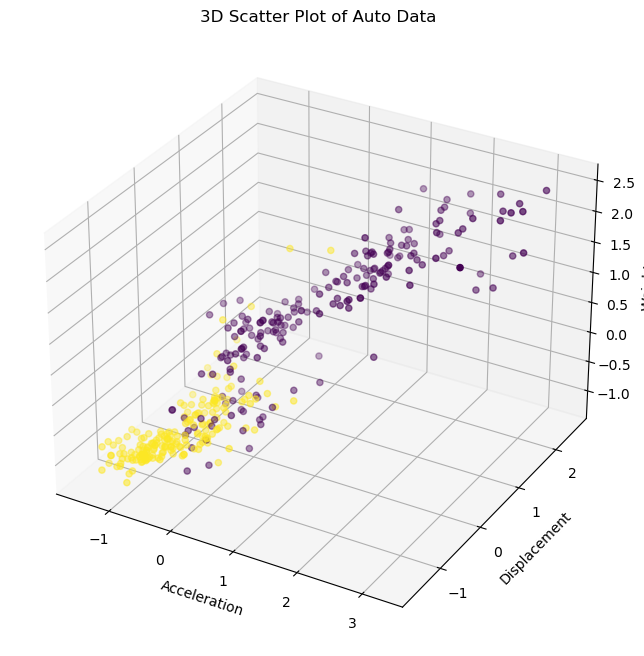

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d



auto = pd.read_csv("/Users/kritinshanmugam/Downloads/auto-mpg.csv")
auto = auto[auto['horsepower'] != '?']
auto['mpg'] = np.where(auto['mpg'] < 23, 0, 1)

X = auto.drop(['car name', 'mpg'], axis=1)
X = X.astype('float64')
X = (X - X.mean())/X.std()
X = X[['horsepower', 'weight', 'displacement']].astype('float64').values
y = auto['mpg'].astype('float64')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')

# Set labels and title
ax.set_xlabel('Acceleration')
ax.set_ylabel('Displacement')
ax.set_zlabel('Weight')
ax.set_title('3D Scatter Plot of Auto Data')

# Show the plot
plt.show()

Here, we can see a 3D plot of our data. Let's see how DBScan clusters our points. 

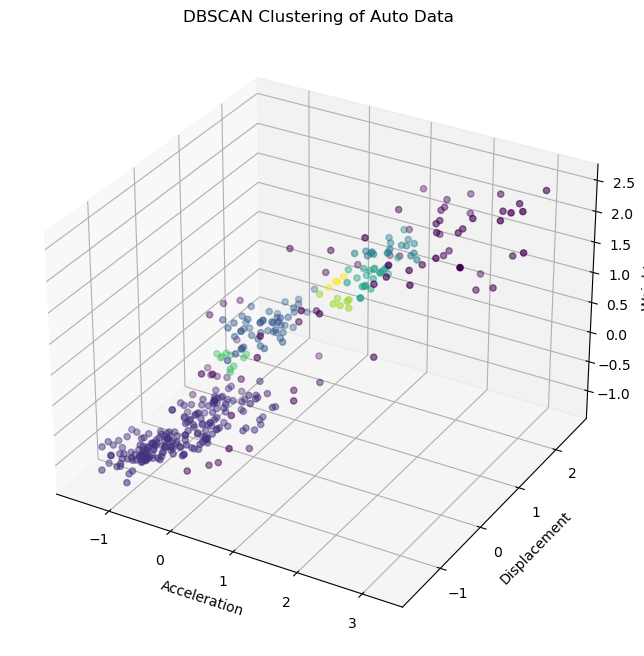

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

dbscanner = DBSCAN(eps = 0.26)

dbscanner.fit(X)

predictions = dbscanner.fit_predict(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points with predicted clusters
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=predictions, cmap='viridis')

# Set labels and title
ax.set_xlabel('Acceleration')
ax.set_ylabel('Displacement')
ax.set_zlabel('Weight')
ax.set_title('DBSCAN Clustering of Auto Data')

# Show the plot
plt.show()


It appears that DBSCAN chose around 3 or 4 clusters. The performance seems just alright. It was able to capture the clusters in the bottom left and upper right, but it added the light blue and turquoise clusters in the middle. This is potentially the fault of the data, since it seems like some datapoints are not necessarily close together. Let's go over K-Means Clustering and see how it compares to DBSCAN. 

#### K-Means

K-Means is a centroid-based clustering algorithm, where the user must specify how many clusters they desire. 

Here's a brief overview of how K-Means works:

* Centroid-Based: K-Means is a centroid-based clustering algorithm, where a cluster is represented by the mean of the data points belonging to the cluster.

* Specifying Number of Clusters: Unlike DBSCAN, K-Means requires the user to specify the number of clusters (K) before utilization.

* Initialization: K-Means initializes K centroids randomly or based on some predetermined method.

* Assignment Step: It assigns each data point to the nearest centroid, forming K clusters.

* Update Step: It recalculates the centroid of each cluster based on the mean of all data points assigned to that cluster.

* Iteration: The assignment and update steps are repeated iteratively until the centroids no longer change significantly, or a specified number of iterations is reached.

K-Means aims to minimize the within-cluster variance, often measured by the sum of squared distances between each data point and its corresponding centroid.

Now, let's use Sci-Kit Learn's implementation of K-Means on our auto-mpg dataset to cluster each car based on their horsepower, weight, and acceleration. We'll specify the number of clusters beforehand, unlike DBSCAN.

/Users/kritinshanmugam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


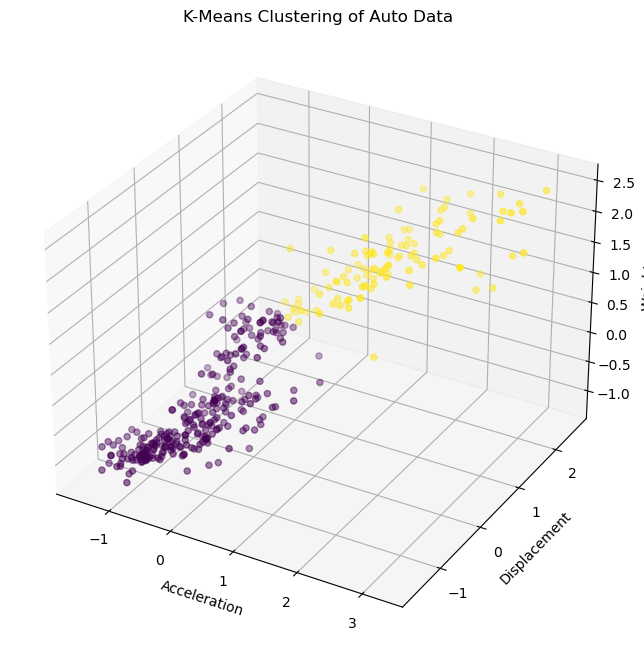

In [45]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)
kmean.fit(X)
labels_k = kmean.predict(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points with predicted clusters
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_k, cmap='viridis')

# Set labels and title
ax.set_xlabel('Acceleration')
ax.set_ylabel('Displacement')
ax.set_zlabel('Weight')
ax.set_title('K-Means Clustering of Auto Data')

# Show the plot
plt.show()

In my opinion, K-Means does better than DBSCAN for our dataset. It is decently accurate with both clusters, most likely because we are able to specify only two clusters. The model becomes slightly inaccurate when deciding the cluster allocations for the middle points. 

Typically, users can plot an elbow curve to determine the optimal amount of clusters for their dataset. The elbow curve is a graphical tool used to determine the optimal number of clusters (K) in K-Means clustering. It plots the within-cluster sum of squares (WCSS) against the number of clusters. The WCSS represents the sum of squared distances between each data point and its corresponding centroid within a cluster. The "elbow" point on the curve, where the rate of decrease in WCSS slows down significantly, indicates the optimal number of clusters. This point suggests a trade-off between increasing the number of clusters (which decreases WCSS) and keeping the model simple.

## Conclusion

In this notebook, we explored two popular clustering algorithms: DBSCAN and K-Means. Clustering algorithms attempt to group datapoints based on certain measures that vary, depending on the algorithm. DBSCAN is density based, while K-Means is centroid-based. 

For our dataset, we were able to visualize the clusters decided by both models. In our case, it seems like K-Means performs better. However, performance can vary depending on the features chosen and the actual dataset. 